#### Import Required Modules

In [1]:
# for data wrangling
import pandas as pd
from pandas import json_normalize

# for stats
import numpy as np
import statistics
import math
from scipy.stats import pearsonr

# for visualisations
import matplotlib.pyplot as plt

# for regex
import re

#### Setup RADAR ?

In [2]:
%run RADAR_set_up.py

/home/nicole/miniconda3/envs/radar_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


detector and tokeniser successfully loaded


#### Load HC3 Data

In [ ]:
HC3_Data = pd.read_json('all.jsonl', lines=True)

In [ ]:
HC3_Data.head(2)

#### Does removing new line characters affect RADAR output? Yes

In [ ]:
originalString = HC3_Data['chatgpt_answers'][0][0]
newLineCharsRemoved = ''.join(originalString.split('\n'))

print("RADAR output of original text", getRADARoutput(originalString))
print("RADAR output of stripped text", getRADARoutput(newLineCharsRemoved))

#### Calculating Number of Words in Texts

In [ ]:
string =  "This is a string with \"\ 7 \n words"
words = re.findall(r'\b\w+\b', string)
print(words)
print(len(words))

#### Number of Words in HC3 AI Texts

In [ ]:
string = HC3_Data['chatgpt_answers'][0][0]
words = re.findall(r'\b\w+\b', string)
print(words)
print(len(words))

In [ ]:
HC3_Data['chatgpt_wordcounts'] = np.nan

In [ ]:
HC3_Data.head()

In [ ]:
for i in range(len(HC3_Data['chatgpt_answers'])):
    if len(HC3_Data['chatgpt_answers'][i]) != 0:
        text = HC3_Data['chatgpt_answers'][i][0]
        HC3_Data['chatgpt_wordcounts'][i] = len(re.findall(r'\b\w+\b', text))

In [ ]:
wordcounts = HC3_Data['chatgpt_wordcounts'].tolist()
wordcounts = [x for x in wordcounts if not math.isnan(x)]

In [ ]:
plt.hist(wordcounts, bins=100)

In [ ]:
plt.boxplot(wordcounts)

In [ ]:
HC3_Data = HC3_Data.sort_values(by='chatgpt_wordcounts', ascending=False)

In [ ]:
HC3_Data.head(100)

#### Kaggle Essay Data Test

In [ ]:
test = pd.read_json('RADAR_processed_data.json', lines=False)

In [ ]:
plt.hist(test['RADAR'], bins=5)
plt.ylabel('human texts')
plt.xlabel('RADAR score')
plt.title('RADAR performance on 500 samples of Kaggle Essay Data')
plt.show()

In [ ]:
plt.boxplot(test['RADAR'])
plt.ylabel('human texts')
plt.xlabel('RADAR score')
plt.title('RADAR performance on 500 samples of Kaggle Essay Data')
plt.show()

#### Main Experiment

In [3]:
pre_RADAR_data = pd.read_csv('topics-pre-RADAR-data.csv')

In [4]:
pre_RADAR_data.columns

Index(['id', 'File', 'Topic', 'Student', 'ChatGPT-3', 'ChatGPT-4',
       'GPT-4_Paraphrasing.io', 'GPT-4_Paraphrasing.io_MANUALLYCORRECTED',
       'GPT-4_Quillbot', 'GPT-4_Grammarly', 'GPT-4_WordAi', 'STUD_spacy',
       'STUD_lemma', 'GPT3_spacy', 'GPT3_lemma', 'GPT4_spacy', 'GPT4_lemma',
       'STUD_sent_count', 'GPT3_sent_count', 'GPT4_sent_count',
       'STUD_word_count', 'GPT3_word_count', 'GPT4_word_count'],
      dtype='object')

In [5]:
columns = {'Student' : 'STUD_RADAR',
           'ChatGPT-3': 'GPT3_RADAR',
           'ChatGPT-4': 'GPT4_RADAR',
            'GPT-4_Quillbot': 'GPT4_Quillbot_RADAR',
            'GPT-4_Grammarly': 'GPT4_Grammarly_RADAR',
            'GPT-4_WordAi': 'GPT4_WordAI_RADAR',
            'GPT-4_Paraphrasing.io': 'GPT4_Paraphrasing_IO_RAW_RADAR',
            'GPT-4_Paraphrasing.io_MANUALLYCORRECTED': 'GPT4_Paraphrasing_IO_EDITED_RADAR'
           }

for outputColumn in columns.values():
    pre_RADAR_data[outputColumn] = np.nan

In [6]:
for inputColumn, outputColumn in columns.items():
    for i in range(1):
        text = pre_RADAR_data[inputColumn][i]
        output = getRADARoutput(text)[0]
        pre_RADAR_data[outputColumn][i] = output

/home/nicole/miniconda3/envs/radar_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
pre_RADAR_data.head()

,id,File,Topic,Student,ChatGPT-3,ChatGPT-4,GPT-4_Paraphrasing.io,GPT-4_Paraphrasing.io_MANUALLYCORRECTED,GPT-4_Quillbot,GPT-4_Grammarly,...,GPT3_word_count,GPT4_word_count,STUD_RADAR,GPT3_RADAR,GPT4_RADAR,GPT4_Quillbot_RADAR,GPT4_Grammarly_RADAR,GPT4_WordAI_RADAR,GPT4_Paraphrasing_IO_RAW_RADAR,GPT4_Paraphrasing_IO_EDITED_RADAR
0,0,essay01.txt,Should students be taught to compete or to coo...,It is always said that competition can effecti...,Education is not only about acquiring knowledg...,Title: Fostering Cooperation and Competition i...,Title: Promoting cooperation and competition i...,Title: Promoting cooperation and competition i...,Title: promoting cooperation and competition i...,Title: Fostering Cooperation and Competition i...,...,258,215,0.57065,0.986301,0.974493,0.975968,0.963674,0.843616,0.989108,0.983982
1,1,essay02.txt,More people are migrating to other countries t...,The last 50 years have seen an increasing numb...,Migration has been a part of human history for...,Title: The Global Rise of Migration: A New Era...,Title: Global Migration Boom: A New Era of Int...,Title: Global Migration Boom: A New Era of Int...,The Global Rise of Migration: A New Era of Int...,Title: The Global Rise of Migration: A New Era...,...,267,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,essay03.txt,International tourism is now more common than ...,The last decade has seen an increasing number ...,International tourism has become an increasing...,Title: The Booming Phenomenon of International...,Title: The exploding phenomenon of internation...,Title: The exploding phenomenon of internation...,Title: The booming phenomenon of international...,Title: The Booming Phenomenon of International...,...,284,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,essay04.txt,International tourism is now more common than ...,The last 50 years have seen a significant incr...,International tourism has indeed become a comm...,Title: The Consequences of International Touri...,Title: Consequences of the unprecedented growt...,Title: Consequences of the unprecedented growt...,Title: The Impacts of International Tourism's ...,Title: The Consequences of International Touri...,...,280,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,essay05.txt,Living and studying overseas,It is every student's desire to study at a goo...,Living and studying overseas can be a life-cha...,Title: The Multifaceted Benefits of Living and...,Title: The multifaceted benefits of living and...,Title: The multifaceted benefits of living and...,Title: The Multifaceted Benefits of Living and...,Title: The Multifaceted Benefits of Living and...,...,283,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pre_RADAR_data.to_csv('topics-post-RADAR-data.csv', index=False)

In [22]:
post_RADAR_data = pd.read_csv('topics-post-RADAR-data.csv')
post_RADAR_data

,id,File,Topic,Student,ChatGPT-3,ChatGPT-4,GPT-4_Paraphrasing.io,GPT-4_Paraphrasing.io_MANUALLYCORRECTED,GPT-4_Quillbot,GPT-4_Grammarly,...,GPT3_word_count,GPT4_word_count,STUD_RADAR,GPT3_RADAR,GPT4_RADAR,GPT4_Quillbot_RADAR,GPT4_Grammarly_RADAR,GPT4_WordAI_RADAR,GPT4_Paraphrasing_IO_RAW_RADAR,GPT4_Paraphrasing_IO_EDITED_RADAR
0,0,essay01.txt,Should students be taught to compete or to coo...,It is always said that competition can effecti...,Education is not only about acquiring knowledg...,Title: Fostering Cooperation and Competition i...,Title: Promoting cooperation and competition i...,Title: Promoting cooperation and competition i...,Title: promoting cooperation and competition i...,Title: Fostering Cooperation and Competition i...,...,258,215,0.57065,0.986301,0.974493,0.975968,0.963674,0.843616,0.989108,0.983982
1,1,essay02.txt,More people are migrating to other countries t...,The last 50 years have seen an increasing numb...,Migration has been a part of human history for...,Title: The Global Rise of Migration: A New Era...,Title: Global Migration Boom: A New Era of Int...,Title: Global Migration Boom: A New Era of Int...,The Global Rise of Migration: A New Era of Int...,Title: The Global Rise of Migration: A New Era...,...,267,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,essay03.txt,International tourism is now more common than ...,The last decade has seen an increasing number ...,International tourism has become an increasing...,Title: The Booming Phenomenon of International...,Title: The exploding phenomenon of internation...,Title: The exploding phenomenon of internation...,Title: The booming phenomenon of international...,Title: The Booming Phenomenon of International...,...,284,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,essay04.txt,International tourism is now more common than ...,The last 50 years have seen a significant incr...,International tourism has indeed become a comm...,Title: The Consequences of International Touri...,Title: Consequences of the unprecedented growt...,Title: Consequences of the unprecedented growt...,Title: The Impacts of International Tourism's ...,Title: The Consequences of International Touri...,...,280,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,essay05.txt,Living and studying overseas,It is every student's desire to study at a goo...,Living and studying overseas can be a life-cha...,Title: The Multifaceted Benefits of Living and...,Title: The multifaceted benefits of living and...,Title: The multifaceted benefits of living and...,Title: The Multifaceted Benefits of Living and...,Title: The Multifaceted Benefits of Living and...,...,283,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,essay86.txt,teaching and researching working together lead...,"Recently, the controversial debate surrounding...",Teaching and research are two interconnected a...,itle: The Symbiosis of Teaching and Research: ...,title: The symbiosis between teaching and rese...,title: The symbiosis between teaching and rese...,Title: The Symbiosis of Teaching and Research:...,title: The Symbiosis of Teaching and Research:...,...,251,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,86,essay87.txt,Can petrol price increase impact on reducing t...,"Nowadays, the importance of vehicles has been ...",Petrol prices have a direct impact on the over...,Title: The Impact of Increased Petrol Prices o...,Title: Impact of rising gasoline prices on tra...,Title: Impact of rising gasoline prices on tra...,Title: The Effect of Rising Gasoline Prices on...,Title: The Impact of Increased Petrol Prices o...,...,261,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,87,essay88.txt,Prefer to live in a small town rather than a city,Many people believe that the life in a major m...,Living in a small town has its own unique char...,Title: The Allure of Small Town Living\n\nIn t...,Title: The appeal of small town living\n\nIn t...,Title: The appeal of small town living\n\nIn t...,Title: The allure o

#### Previous Results

(array([27., 17., 19., 12., 15.]),
 array([0.02195615, 0.21196148, 0.4019668 , 0.59197213, 0.78197745,
        0.97198278]),
 <BarContainer object of 5 artists>)

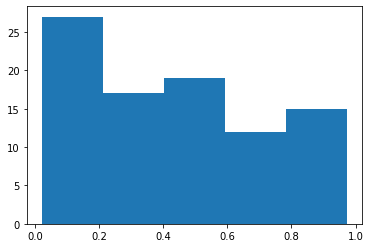

In [61]:
plt.hist(Test_Data['STUD_RADAR'], bins=5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f007b1d1050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f007b1d81d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f007b1d17d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f007b1d8890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f007b1d8bd0>],
 'means': []}

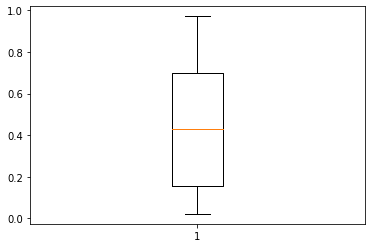

In [62]:
plt.boxplot(Test_Data['STUD_RADAR'])

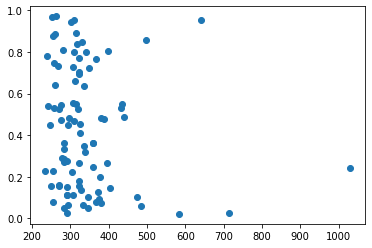

In [63]:
plt.scatter(Test_Data['STUD_word_count'], Test_Data['STUD_RADAR'])

In [66]:
corr, p_value = pearsonr(Test_Data['STUD_word_count'], Test_Data['STUD_RADAR'])

print("Pearson correlation coefficient:", corr)
print("P-value:", p_value)

Pearson correlation coefficient: -0.14201040472101745
P-value: 0.18181920263783471


In [ ]:
HC3_sample = HC3_Data.sample(n=100)

In [ ]:
HC3_sample

In [ ]:
HC3_sample[['question', 'chatgpt_answers']].to_csv('output.csv', index=False)